**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - EDA Checkpoint

# Names

- Kavin Raj
- Arnav Saxena
- Tiantong Wu
- Peike Xu
- Jing Yin Yip

# Research Question

How do opinionated tweets on Twitter as measured by a sentiment analysis model affect the stock price of Tesla within the time period of September 2021 to September 2022?

## Background and Prior Work

Twitter is a widely used social media platform for expressing many kinds of opinions, including those on certain companies. We believe that this may have an impact on the public perception of these companies, and we aim to investigate whether there is a connection between opinions expressed in social media and the actual stock prices of the companies in question. An example of was seen this back in 2021, when “a thread on r/WallStreetBets”  caused “more than 7,200% increase in GME—and a 689% run”<a name="cite_note-1"></a> <sup>[<a href="#cite_ref-1">1</a>]</sup> . This occurence informed us that there is a potential causal effect between opinions on social media and real-world stock prices; we think that this effect has a much greater scope than just this isolated case of GameStop stocks, and we are interested in seeing if this is a larger, more general phenomenon that can be applied to other time periods and companies.

When reading a research paper from the IOP conference series, we found a sentiment analysis model based on social media opinion on stock trading. It was remarked in the conclusion that “looking into correlation coefficient compared by number of days before and after the trading day, the result shows that correlation reaches to the peak on trading day then it gradually declines with the magnitude depending on the day length after trading day.” <a name="cite_note-2"></a> <sup>[<a href="#cite_ref-2">2</a>]</sup> This research is similar to what we aim to investigate, as the paper conducted their test on a Thai social media platform called Pantip, and discussed ten Thai companies. The paper provides more evidence that there is a causal link between social media sentiment and stock prices, and we are interested to see if a similar trend can be seen with tweets and tech companies' stocks in the US. Additionally, we would also like to investigate if there are other similarities or differences in the trends that we are able to identify between our research and the paper, such as the correlation between variables reaching a peak on trading day.

1. <a name="cite_note-1"></a> <sup>[<a href="#cite_ref-1">1</a>]</sup> Rechel, J. (28 Jan 2021) How social media moves markets: Analyzing GameStop (GME) using social listening data. Sprout Blog.
   <br> https://sproutsocial.com/insights/gamestop-stock-social-media

2. <a name="cite_note-2"></a> <sup>[<a href="#cite_ref-2">2</a>]</sup>  P Padhanarath et al 2019 IOP Conf. Ser.: Mater. Sci. Eng. 620 012094.
   <br>https://iopscience.iop.org/article/10.1088/1757-899X/620/1/012094/pdf


# Hypothesis


Before answering our research question by investigating the available data, we think that there will be a positive correlation between a positive sentiment for a company and said company’s stock prices rising, as well as a positive correlation between a negative sentiment for a company and said company’s stock prices falling. This is due to the connection between a company’s public perception, how that is reflected in social media, and how it manifests in the stock market. If tweets about a company are mostly negative within a certain time period, we would expect to observe a decrease in stock prices, as both phenomena correspond to a decrease in public perception of the company. However, we also acknowledge that this relationship may not be as straightforward as is stated here, as there may be other confounds affecting each variable, such as Twitter only capturing the sentiment of a more vocal sample of people as compared to the rest of the population.

# Data

## Data overview

- Dataset #1
  - Dataset Name: Tweet Stock
  - Link to the dataset: https://www.kaggle.com/code/shreytandel19/stock-prediction-based-on-tweet-sentiment-analysis/input
  - Number of observations: 80793
  - Number of variables: 4
- Dataset #2
  - Dataset Name: TESLA_HISTORICAL
  - Link to the dataset: https://www.nasdaq.com/market-activity/stocks/tsla/historical
  - Number of observations: 1258
  - Number of variables: 6

The first dataset, Tweet Stock, is a collection of tweets that talk about TSLA, the stock for the company Tesla. The time range for this datasets is from September 30th, 2021 to September 29th, 2022, and was chosen  since we are unable to obtain current Twitter data, and need to rely on past data that has already been collected. The two important variables in this dataset are the dates that the tweets were posted, as well as the tweets themselves. The tweets are in the form of strings, and the dates will be converted into a standard Timestamp format. The tweets in this dataset will be used as a proxy for social media opinion, once it is processed by a sentiment analysis model.

The second dataset, TESLA_HISTORICAL, is a record of prices of the TSLA stock on each day from September 30th, 2021 to September 29th, 2022. This time range was chosen to match the time range of the other dataset. In the dataset, the highest, lowest, and open/close prices of the stock are recorded as floats in each row, along with the corresponding day, which will be converted into a standard Timestamp format. These variables can provide insight into how a stock varies within a day, and comparing these across different days can lead to potential trends over time. The prices are a direct factual record of TSLA prices, although further numerical processing may be needed later to reveal meaningful trends.

Further details of the specific steps taken to clean the datasets will be explained below.

## Set up

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize
import re


nltk.download('opinion_lexicon')
nltk.download('punkt') 
nltk.download('stopwords')

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

[nltk_data] Error loading opinion_lexicon: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>


### Tweet Stock

We read the csv file, convert it to a dataframe, and drop any rows that contain empty values. Then, dates in the "Date" variable are converted  into standard Timestamp format. Afterwards, we narrow down the tweets to anything that includes "TSLA", and convert all the tweets into lower case, which is needed later for sentiment analysis.

In [2]:
tweet = pd.read_csv('stock_tweets.csv')
tweet.dropna(inplace=True)
#delete any missing value within the dataset
tweet['Date'] = pd.to_datetime(tweet.get('Date')).dt.date
#convert the date enteries into standarized form
tweet_tesla = tweet[tweet.get('Stock Name')=='TSLA']
#reduced the dataset into Tesla only
tweet_tesla['Tweet'] = tweet_tesla['Tweet'].str.lower()
sentiment = SentimentIntensityAnalyzer()

# # #tokenize the tweet and remove stopwords for furthur sentiment analysis
# print(tweet_tesla.loc[0]['Tweet'])
# tweet_tesla['Tweet'] = tweet_tesla['Tweet'].apply(lambda tt: re.sub(r"(@[A-Za-z0-9]+)", "", tt))
# tweet_tesla['Tweet'] = tweet_tesla['Tweet'].apply(word_tokenize)
# stop_words = set(stopwords.words('english'))
# tweet_tesla['Tweet'].apply(lambda x: [item for item in x if item not in stop_words])
# tweet_tesla['Tweet'] = tweet_tesla['Tweet'].apply(keep_alphanumeric)

#sentiment analysis
tweet_tesla['sentimental score'] = tweet_tesla['Tweet'].apply(sentiment.polarity_scores)

compound_score = []
for score in tweet_tesla['sentimental score']:
    compound_score.append(score['compound'])
compound_score

tweet_tesla['sentimental score'] = compound_score

tweet_tesla

/var/folders/f3/ysl877l940z8tbwhd_z01t1c0000gq/T/ipykernel_2819/3661001199.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_tesla['Tweet'] = tweet_tesla['Tweet'].str.lower()
/var/folders/f3/ysl877l940z8tbwhd_z01t1c0000gq/T/ipykernel_2819/3661001199.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_tesla['sentimental score'] = tweet_tesla['Tweet'].apply(sentiment.polarity_scores)
/var/folders/f3/ysl877l940z8tbwhd_z01t1c0000gq/T/ipykernel_2819/3661001199.py:27: SettingWithCopyWarning: 
A val

,Date,Tweet,Stock Name,Company Name,sentimental score
0,2022-09-29,mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",0.0772
1,2022-09-29,tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",0.0000
2,2022-09-29,3/ even if i include 63.0m unvested rsus as of...,TSLA,"Tesla, Inc.",0.2960
3,2022-09-29,@realdanodowd @wholemarsblog @tesla hahaha why...,TSLA,"Tesla, Inc.",-0.7568
4,2022-09-29,"@realdanodowd @tesla stop trying to kill kids,...",TSLA,"Tesla, Inc.",-0.8750
...,...,...,...,...,...
37417,2021-09-30,playing in the dirt and #chasingsunsets\n@tesl...,TSLA,"Tesla, Inc.",-0.1531
37418,2021-09-30,i agree with @freshjiva that $tsla ‘s ev busin...,TSLA,"Tesla, Inc.",0.5719
37419,2021-09-30,hold. on. tight. $tsla,TSLA,"Tesla, Inc.",0.0000
37420,2021-09-30,get ready for a $tsla _ _ _ _ _ _ q3 delivery...,TSLA,"Tesla, Inc.",0.4215


In [3]:
# # tweets_multiple = pd.read_csv('Tweet.csv')
# # id_to_company = pd.read_csv('Company_Tweet.csv')
# tweets_multiple = tweets_multiple.join(id_to_company.set_index('tweet_id'), on='tweet_id')
# tweets_multiple.dropna(inplace=True)
# #delete any missing value within the dataset


# # tweet['Date'] = pd.to_datetime(tweet.get('Date')).dt.date
# # #convert the date enteries into standarized form
# # tweet_tesla = tweet[tweet.get('Stock Name')=='TSLA']
# # #reduced the dataset into Tesla only
# # tweet_tesla['Tweet'] = tweet_tesla['Tweet'].str.lower()
# # #convert all the tweet into lower case for easier analysis
# # # %pip install nltk
# # # import nltk
# # # from nltk.corpus import stopwords
# # # from nltk.tokenize import word_tokenize
# # print(tweet_tesla.loc[0]['Tweet'])
# # tweet_tesla['Tweet'] = tweet_tesla['Tweet'].apply(lambda tt: re.sub(r"(@[A-Za-z0-9_]+)", "", tt))
# # tweet_tesla['Tweet'] = tweet_tesla['Tweet'].apply(word_tokenize)
# # stop_words = set(stopwords.words('english'))

# # tweet_tesla['Tweet'].apply(lambda x: [item for item in x if item not in stop_words])
# # # #tokenize the tweet and remove stopwords for furthur sentiment analysis

# tweets_multiple = tweets_multiple[['post_date', 'body', 'ticker_symbol']]
# #drop irrelvant columns

# tweets_multiple['Date'] = pd.to_datetime(tweets_multiple['post_date'], unit='s').dt.date

# tweets_multiple = tweets_multiple[['Date', 'body', 'ticker_symbol']]
# tweets_multiple.columns = ['Date', 'Tweet', 'Stock Name']
# tweets_multiple = tweets_multiple.sort_values(by=['Stock Name', 'Date'])

# tweets_multiple = tweets_multiple.reset_index(drop=True)
# tweets_multiple["isStatusChanged"] = tweets_multiple["Stock Name"].shift(1, fill_value=tweets_multiple["Stock Name"].head(1)) != tweets_multiple["Stock Name"]

# tweets_multiple.loc[tweets_multiple["isStatusChanged"] == True]

# apple_tweets = tweets_multiple.iloc[:1414802].drop(columns=['isStatusChanged']).reset_index(drop=True)
# amazon_tweets = tweets_multiple.iloc[1414802:2123994].drop(columns=['isStatusChanged']).reset_index(drop=True)
# google_tweets = tweets_multiple.iloc[2123994:2833526].drop(columns=['isStatusChanged']).reset_index(drop=True)
# microsoft_tweets = tweets_multiple.iloc[2833526:3207324].drop(columns=['isStatusChanged']).reset_index(drop=True)
# tesla_tweets = tweets_multiple.iloc[3207324:].drop(columns=['isStatusChanged']).reset_index(drop=True)

In [4]:
# microsoft_tweets

In [5]:
# # Load positive and negative words from the opinion lexicon
# # sentiment analysis
# positive_words = set(opinion_lexicon.positive())
# negative_words = set(opinion_lexicon.negative())

# def analyze_sentiment(words):
#     c = 0
#     for word in words:
#         if word in positive_words:
#             c +=1
#         elif word in negative_words:
#             c -=1
#         else:
#             c += 0
#     if(c>1):
#         return 1
#     elif c == 0:
#         return 0
#     else:
#         return -1
# tweet_tesla['sentimental score'] = tweet_tesla['Tweet'].apply(analyze_sentiment)
# tweet_tesla

## TESLA_HISTORICAL

We first read the csv file for Tesla and convert it into a dataframe. Following that, any rows that contain empty values are dropped. We then convert the date to standard Timestamp format, to make it easier to manipulate the certain dates we are looking for. For the price variables, dollar signs in the entries are removed, and the numerical values are converted to floats. Lastly, the appropriate time range is selected to match our dataset of Tweets.

In [6]:
tesla = pd.read_csv('TESLA_HISTORICAL.csv')
tesla.dropna(inplace=True)
#delete any missing value within the dataset
tesla['Date'] = pd.to_datetime(tesla.get('Date')).dt.date
#convert the date enteries into standarized form
def nodollartofloat(series):
    series = series.str.strip('$')
    blank = []
    for i in series:
        i = float(i)
        blank = np.append(blank,i)
    return blank
tesla['End Day Price'] = nodollartofloat(tesla['Close/Last'])
tesla['Beginning Day Price'] = nodollartofloat(tesla['Open'])
tesla['Highest Price'] = nodollartofloat(tesla['High'])
tesla['Lowest Price'] = nodollartofloat(tesla['Low'])
tesla = tesla.drop(['Close/Last','Volume','Open','High','Low'], axis=1)
#convert all string input into number

start_date = pd.to_datetime('2021-09-30').date()
end_date = pd.to_datetime('2022-09-29').date()

tesla = tesla[(tesla['Date'] >= start_date) & (tesla['Date'] <= end_date)]
tesla.reset_index(drop=True, inplace=True)
tesla

,Date,End Day Price,Beginning Day Price,Highest Price,Lowest Price
0,2022-09-29,268.2100,282.7600,283.6500,265.7800
1,2022-09-28,287.8100,283.0800,289.0000,277.5700
2,2022-09-27,282.9400,283.8400,288.6700,277.5100
3,2022-09-26,276.0100,271.8300,284.0900,270.3100
4,2022-09-23,275.3300,283.0900,284.5000,272.8200
...,...,...,...,...,...
247,2021-10-06,260.9166,258.7333,262.2200,257.7400
248,2021-10-05,260.1966,261.5986,265.7700,258.0666
249,2021-10-04,260.5100,265.5000,268.9899,258.7066
250,2021-10-01,258.4066,259.4666,260.2600,254.5300


# Results

## Exploratory Data Analysis

Carry out whatever EDA you need to for your project.  Because every project will be different we can't really give you much of a template at this point. But please make sure you describe the what and why in text here as well as providing interpretation of results and context.

### Section 1 of EDA - please give it a better title than this

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [7]:
## YOUR CODE HERE
tweet_tesla = pd.merge(tweet_tesla, tesla, on='Date', how='inner')
tweet_tesla


,Date,Tweet,Stock Name,Company Name,sentimental score,End Day Price,Beginning Day Price,Highest Price,Lowest Price
0,2022-09-29,mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",0.0772,268.2100,282.7600,283.6500,265.7800
1,2022-09-29,tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",0.0000,268.2100,282.7600,283.6500,265.7800
2,2022-09-29,3/ even if i include 63.0m unvested rsus as of...,TSLA,"Tesla, Inc.",0.2960,268.2100,282.7600,283.6500,265.7800
3,2022-09-29,@realdanodowd @wholemarsblog @tesla hahaha why...,TSLA,"Tesla, Inc.",-0.7568,268.2100,282.7600,283.6500,265.7800
4,2022-09-29,"@realdanodowd @tesla stop trying to kill kids,...",TSLA,"Tesla, Inc.",-0.8750,268.2100,282.7600,283.6500,265.7800
...,...,...,...,...,...,...,...,...,...
30023,2021-09-30,playing in the dirt and #chasingsunsets\n@tesl...,TSLA,"Tesla, Inc.",-0.1531,258.4933,260.3333,263.0435,258.3333
30024,2021-09-30,i agree with @freshjiva that $tsla ‘s ev busin...,TSLA,"Tesla, Inc.",0.5719,258.4933,260.3333,263.0435,258.3333
30025,2021-09-30,hold. on. tight. $tsla,TSLA,"Tesla, Inc.",0.0000,258.4933,260.3333,263.0435,258.3333
30026,2021-09-30,get ready for a $tsla _ _ _ _ _ _ q3 delivery...,TSLA,"Tesla, Inc.",0.4215,258.4933,260.3333,263.0435,258.3333


In [8]:
tweet_tesla['Price Difference'] = tweet_tesla['End Day Price']- tweet_tesla['Beginning Day Price']
tweet_tesla['sentimental score'] = tweet_tesla.groupby('Date')['sentimental score'].transform('mean')
tweet_tesla

,Date,Tweet,Stock Name,Company Name,sentimental score,End Day Price,Beginning Day Price,Highest Price,Lowest Price,Price Difference
0,2022-09-29,mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",0.055609,268.2100,282.7600,283.6500,265.7800,-14.55
1,2022-09-29,tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",0.055609,268.2100,282.7600,283.6500,265.7800,-14.55
2,2022-09-29,3/ even if i include 63.0m unvested rsus as of...,TSLA,"Tesla, Inc.",0.055609,268.2100,282.7600,283.6500,265.7800,-14.55
3,2022-09-29,@realdanodowd @wholemarsblog @tesla hahaha why...,TSLA,"Tesla, Inc.",0.055609,268.2100,282.7600,283.6500,265.7800,-14.55
4,2022-09-29,"@realdanodowd @tesla stop trying to kill kids,...",TSLA,"Tesla, Inc.",0.055609,268.2100,282.7600,283.6500,265.7800,-14.55
...,...,...,...,...,...,...,...,...,...,...
30023,2021-09-30,playing in the dirt and #chasingsunsets\n@tesl...,TSLA,"Tesla, Inc.",0.251110,258.4933,260.3333,263.0435,258.3333,-1.84
30024,2021-09-30,i agree with @freshjiva that $tsla ‘s ev busin...,TSLA,"Tesla, Inc.",0.251110,258.4933,260.3333,263.0435,258.3333,-1.84
30025,2021-09-30,hold. on. tight. $tsla,TSLA,"Tesla, Inc.",0.251110,258.4933,260.3333,263.0435,258.3333,-1.84
30026,2021-09-30,get ready for a $tsla _ _ _ _ _ _ q3 delivery...,TSLA,"Tesla, Inc.",0.251110,258.4933,260.3333,263.0435,258.3333,-1.84


In [10]:
tweet_tesla['sentimental score'] = tweet_tesla['sentimental score']*100
tweet_tesla = tweet_tesla.drop_duplicates(subset='Date', keep='first')
tweet_tesla

,Date,Tweet,Stock Name,Company Name,sentimental score,End Day Price,Beginning Day Price,Highest Price,Lowest Price,Price Difference
0,2022-09-29,mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",556.089286,268.2100,282.7600,283.6500,265.7800,-14.5500
112,2022-09-28,$aapl and $tsla have seen big inflows from ret...,TSLA,"Tesla, Inc.",1274.813333,287.8100,283.0800,289.0000,277.5700,4.7300
187,2022-09-27,elon making burn jokes is bullish.\n\n$tsla ht...,TSLA,"Tesla, Inc.",2254.600000,282.9400,283.8400,288.6700,277.5100,-0.9000
272,2022-09-26,"$tsla since 2019, legacy auto has made up for ...",TSLA,"Tesla, Inc.",1168.444444,276.0100,271.8300,284.0900,270.3100,4.1800
344,2022-09-23,bears this week\n$spy $qqq $tsla https://t.co/...,TSLA,"Tesla, Inc.",1509.500000,275.3300,283.0900,284.5000,272.8200,-7.7600
...,...,...,...,...,...,...,...,...,...,...
29559,2021-10-06,more new features on my $tsla model s today 💪 ...,TSLA,"Tesla, Inc.",2259.307692,260.9166,258.7333,262.2200,257.7400,2.1833
29637,2021-10-05,uk police making the switch to @tesla model 3....,TSLA,"Tesla, Inc.",974.477273,260.1966,261.5986,265.7700,258.0666,-1.4020
29725,2021-10-04,$tsla / $ndx\n\nit's probably not nothing. htt...,TSLA,"Tesla, Inc.",1535.462185,260.5100,265.5000,268.9899,258.7066,-4.9900
29844,2021-10-01,"my neighbors took delivery, 9/29! he stopped ...",TSLA,"Tesla, Inc.",2210.351064,258.4066,259.4666,260.2600,254.5300,-1.0600


### Section 2 of EDA if you need it  - please give it a better title than this

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

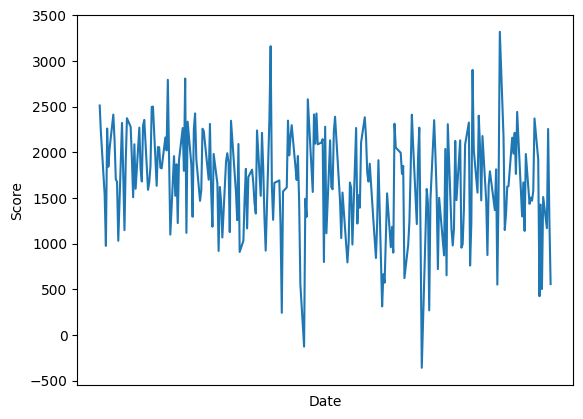

In [11]:
f1 = plt.gcf()
# YOUR CODE HERE
x = tweet_tesla['Date']
y = tweet_tesla['sentimental score']
plt.xlabel('Date')
plt.ylabel('Score')
plt.xticks(np.arange(0,75,step = 5))
plt.plot(x.values,y.values,label='Sentimental Score per day')

In [ ]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

# Ethics & Privacy

In our project, there exist several ethical and privacy concerns. First of all, to collect users' twitter posts might be a violation of privacy. Although Twitter posts are publicly posted, people might not want to have their posts be a part of a project or an experiment. Thus, we planned to handle this privacy issue by anonymizing all data from the users. In addition, there exists a potential bias that it is hard to judge a human written post as simply positive or negative. Some posts might contain emotions that are complex. People might be confused about the trend of a stock's price, or hard to determine whether they are clearly for or clearly against a change in the stock prices. Also, we should be able to accurately interpret the information contained in a twitter post. To handle this issue, we must present our findings as transparently as possible. Also, since our data set is relatively large(there are thousands of twitter posts), we could clearly identify the ones who are less complex or have clear stances, and analyze the correlation between those posts and the stock prices.

One of the concerns is that our data relies heavily on the judgements of a sentiment analysis model. It's important to use these models with caution, be aware of their potential shortcomings, and complement them with human judgment and context whenever possible to ensure the most accurate and reliable analysis of sentiment in your data. Also, the words defined for negative in a stock context might be different with general sentiment analysis. We can try out several analysis models and compare the results between different models, finding the most accurate model. 

# Team Expectations 

- **Timely Project Work**:

    Punctuality: Complete tasks promptly, meet deadlines, and maintain a consistent effort for synchronized project progress.

    Equitable Contribution: Ensure a fair distribution of responsibilities by contributing proportionately to the project workload.

    Proactivity: Embrace a proactive work ethic by actively engaging with project requirements.

- **Open and Consistent Communication**:

    Transparency: Share information openly about task progress, challenges, and potential workloads.

    Conflict Resolution: Address conflicts promptly, seeking resolutions or proposing solutions for effective problem-solving.

    Regular Updates: Provide consistent updates on task status, checkpoints, and any changes to the project plan.

<!-- - Keeping up with the project work in a timely manner with everyone providing similar effort to the project
- Having open and consistent communication to update everyone on any conflicts and issues in order to proceed with the project smoothly.  -->

# Project Timeline Proposal

Two aspects that we may need guidance on are: obtaining data from social media sites where APIs may not be available; and using sentiment analysis models to determine whether text is positve or negative towards certain entities.



| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 11/5  |  1 PM | Proposal  | Collect Datasets, Assign EDA Tasks | 
| 11/12  |  1 PM |  Collection of Raw Data; Data cleaning | Completing Checkpoint 1 | 
| 11/20  | 1 PM | Seeking more datas; Starting setiment analysis | Look for datasets of other potential stocks/tweets; Start EDA for existing data |
| 11/25  | 1 PM | Finishing up EDA, starting analysis | Completing Checkpoint 2 |
| 12/3  | 1 PM  | Draft the report, discussion results | Start Final Project Report |
| 12/11 | 1 PM  | Finalize Project |Prepare for the final presentation |